In [82]:
!pip install bertopic

In [275]:
%%time
from bertopic import BERTopic
from umap import UMAP
import pandas as pd

# Read the file, change the name for different csv file
df = pd.read_csv('chinese.csv')

CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 14 ms


In [276]:
df.head()

,business_id,name,category,stars,text
0,bdfZdB2MTXlT6-RBjSIpQg,Pho Bistro,Chinese,negative,The chick that works here is seriously retarde...
1,bdfZdB2MTXlT6-RBjSIpQg,Pho Bistro,Chinese,negative,It's okay. If you do not have a car and need s...
2,bdfZdB2MTXlT6-RBjSIpQg,Pho Bistro,Chinese,positive,Honestly this place is pretty good. I've gone ...
3,bdfZdB2MTXlT6-RBjSIpQg,Pho Bistro,Chinese,negative,My son got a pho and thought it was ok. My dau...
4,bdfZdB2MTXlT6-RBjSIpQg,Pho Bistro,Chinese,positive,The pineapple fried rice that I ordered was ve...


In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  424 non-null    object
 1   name         424 non-null    object
 2   category     424 non-null    object
 3   stars        424 non-null    object
 4   text         424 non-null    object
dtypes: object(5)
memory usage: 16.7+ KB


In [278]:
# Build the Topic Model
from bertopic.representation import KeyBERTInspired
# Define the four topics
zeroshot_topic_list = ["price", "wait", "quality", "service"]
# Use UMAP model
umap_model = UMAP(n_neighbors=5,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=100)
topic_model = BERTopic(
    umap_model = umap_model,
    embedding_model="thenlper/gte-small",
    min_topic_size=5,
    zeroshot_topic_list=zeroshot_topic_list,
    zeroshot_min_similarity=.8,
    representation_model=KeyBERTInspired()
)
topics, _ = topic_model.fit_transform(df.text)

In [279]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,75,service,"[restaurant, service, food, customer, customer...","[As much as I love Panda, I'm very disappointe..."
1,1,32,price,"[restaurant, food, bistro, pho, pricey, expens...",[As a pho connoisseur of sorts (my parents are...
2,2,15,wait,"[restaurant, waiting, wait, food, waited, eat,...",[It's clean and well lighted. It has a menu f...
3,3,13,quality,"[food, tasted, eat, delicious, taste, pho, fre...",[I am speaking on behalf of a to-go chicken ph...
4,4,63,-1_food_spicy_noodles_eating,"[food, spicy, noodles, eating, pork, lunch, me...",[I went here one night on a whim b/c I drive b...
5,5,30,0_pho_tasted_bistro_food,"[pho, tasted, bistro, food, bland, soup, fried...",[I always went to Pho Bistro while I was atten...
6,6,29,1_pho_food_noodles_reviews,"[pho, food, noodles, reviews, bistro, noodle, ...",[THIS PLACE IS AWESOME! \nAfter looking at the...
7,7,25,2_restaurant_food_eat_buffet,"[restaurant, food, eat, buffet, noodles, noodl...",[This place is amazing. I don't understand the...
8,8,23,3_food_express_worst_panda,"[food, express, worst, panda, chicken, custome...","[Love Panda, this location has serious managem..."
9,9,17,4_food_delicious_noodles_spicy,"[food, delicious, noodles, spicy, soup, cooked...",[Best Asian place in Isla Vista. \n\nMy favori...


In [280]:
# Dataframe the get_document_info
topic_df = topic_model.get_document_info(df.text)
topic_df

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Representative_document
0,The chick that works here is seriously retarde...,2,wait,"[restaurant, waiting, wait, food, waited, eat,...",[It's clean and well lighted. It has a menu f...,restaurant - waiting - wait - food - waited - ...,False
1,It's okay. If you do not have a car and need s...,4,-1_food_spicy_noodles_eating,"[food, spicy, noodles, eating, pork, lunch, me...",[I went here one night on a whim b/c I drive b...,food - spicy - noodles - eating - pork - lunch...,False
2,Honestly this place is pretty good. I've gone ...,6,1_pho_food_noodles_reviews,"[pho, food, noodles, reviews, bistro, noodle, ...",[THIS PLACE IS AWESOME! \nAfter looking at the...,pho - food - noodles - reviews - bistro - nood...,False
3,My son got a pho and thought it was ok. My dau...,11,6_thai_noodles_food_pad,"[thai, noodles, food, pad, awful, chicken, tas...",[aesthetics: 1/5\nfood: 1/5\nservice: 3/5\n\ni...,thai - noodles - food - pad - awful - chicken ...,False
4,The pineapple fried rice that I ordered was ve...,0,service,"[restaurant, service, food, customer, customer...","[As much as I love Panda, I'm very disappointe...",restaurant - service - food - customer - custo...,False
...,...,...,...,...,...,...,...
419,Love the buns and pork belly! Solid beer selec...,16,11_baos_food_pork_bao,"[baos, food, pork, bao, eat, noodles, deliciou...",[I've passed by this place multiple times on t...,baos - food - pork - bao - eat - noodles - del...,False
420,The noodle is quite authentic and the pork bel...,0,service,"[restaurant, service, food, customer, customer...","[As much as I love Panda, I'm very disappointe...",restaurant - service - food - customer - custo...,False
421,their bowls are too small. I ordered a pork be...,4,-1_food_spicy_noodles_eating,"[food, spicy, noodles, eating, pork, lunch, me...",[I went here one night on a whim b/c I drive b...,food - spicy - noodles - eating - pork - lunch...,False
422,"Good food, friendly price, don't expect high q...",1,price,"[restaurant, food, bistro, pho, pricey, expens...",[As a pho connoisseur of sorts (my parents are...,restaurant - food - bistro - pho - pricey - ex...,False


In [281]:
topic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 0 to 423
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Document                 424 non-null    object
 1   Topic                    424 non-null    int64 
 2   Name                     424 non-null    object
 3   Representation           424 non-null    object
 4   Representative_Docs      424 non-null    object
 5   Top_n_words              424 non-null    object
 6   Representative_document  424 non-null    bool  
dtypes: bool(1), int64(1), object(5)
memory usage: 23.6+ KB


In [282]:
# Rename topic_df column name 'document' to 'text'

topic_df = topic_df.rename(columns={'Document': 'text'})
topic_df

,text,Topic,Name,Representation,Representative_Docs,Top_n_words,Representative_document
0,The chick that works here is seriously retarde...,2,wait,"[restaurant, waiting, wait, food, waited, eat,...",[It's clean and well lighted. It has a menu f...,restaurant - waiting - wait - food - waited - ...,False
1,It's okay. If you do not have a car and need s...,4,-1_food_spicy_noodles_eating,"[food, spicy, noodles, eating, pork, lunch, me...",[I went here one night on a whim b/c I drive b...,food - spicy - noodles - eating - pork - lunch...,False
2,Honestly this place is pretty good. I've gone ...,6,1_pho_food_noodles_reviews,"[pho, food, noodles, reviews, bistro, noodle, ...",[THIS PLACE IS AWESOME! \nAfter looking at the...,pho - food - noodles - reviews - bistro - nood...,False
3,My son got a pho and thought it was ok. My dau...,11,6_thai_noodles_food_pad,"[thai, noodles, food, pad, awful, chicken, tas...",[aesthetics: 1/5\nfood: 1/5\nservice: 3/5\n\ni...,thai - noodles - food - pad - awful - chicken ...,False
4,The pineapple fried rice that I ordered was ve...,0,service,"[restaurant, service, food, customer, customer...","[As much as I love Panda, I'm very disappointe...",restaurant - service - food - customer - custo...,False
...,...,...,...,...,...,...,...
419,Love the buns and pork belly! Solid beer selec...,16,11_baos_food_pork_bao,"[baos, food, pork, bao, eat, noodles, deliciou...",[I've passed by this place multiple times on t...,baos - food - pork - bao - eat - noodles - del...,False
420,The noodle is quite authentic and the pork bel...,0,service,"[restaurant, service, food, customer, customer...","[As much as I love Panda, I'm very disappointe...",restaurant - service - food - customer - custo...,False
421,their bowls are too small. I ordered a pork be...,4,-1_food_spicy_noodles_eating,"[food, spicy, noodles, eating, pork, lunch, me...",[I went here one night on a whim b/c I drive b...,food - spicy - noodles - eating - pork - lunch...,False
422,"Good food, friendly price, don't expect high q...",1,price,"[restaurant, food, bistro, pho, pricey, expens...",[As a pho connoisseur of sorts (my parents are...,restaurant - food - bistro - pho - pricey - ex...,False


In [283]:
# Merge df and topic_df on the column 'text'

import pandas as pd
merged_df = pd.merge(df, topic_df, on='text')
merged_df.head()


,business_id,name,category,stars,text,Topic,Name,Representation,Representative_Docs,Top_n_words,Representative_document
0,bdfZdB2MTXlT6-RBjSIpQg,Pho Bistro,Chinese,negative,The chick that works here is seriously retarde...,2,wait,"[restaurant, waiting, wait, food, waited, eat,...",[It's clean and well lighted. It has a menu f...,restaurant - waiting - wait - food - waited - ...,False
1,bdfZdB2MTXlT6-RBjSIpQg,Pho Bistro,Chinese,negative,It's okay. If you do not have a car and need s...,4,-1_food_spicy_noodles_eating,"[food, spicy, noodles, eating, pork, lunch, me...",[I went here one night on a whim b/c I drive b...,food - spicy - noodles - eating - pork - lunch...,False
2,bdfZdB2MTXlT6-RBjSIpQg,Pho Bistro,Chinese,positive,Honestly this place is pretty good. I've gone ...,6,1_pho_food_noodles_reviews,"[pho, food, noodles, reviews, bistro, noodle, ...",[THIS PLACE IS AWESOME! \nAfter looking at the...,pho - food - noodles - reviews - bistro - nood...,False
3,bdfZdB2MTXlT6-RBjSIpQg,Pho Bistro,Chinese,negative,My son got a pho and thought it was ok. My dau...,11,6_thai_noodles_food_pad,"[thai, noodles, food, pad, awful, chicken, tas...",[aesthetics: 1/5\nfood: 1/5\nservice: 3/5\n\ni...,thai - noodles - food - pad - awful - chicken ...,False
4,bdfZdB2MTXlT6-RBjSIpQg,Pho Bistro,Chinese,positive,The pineapple fried rice that I ordered was ve...,0,service,"[restaurant, service, food, customer, customer...","[As much as I love Panda, I'm very disappointe...",restaurant - service - food - customer - custo...,False


In [284]:
# Select the four topics price, wait, service, and quality

filtered_df = merged_df[merged_df['Name'].isin(['price', 'wait', 'service', 'quality'])]


In [285]:
filtered_df

,business_id,name,category,stars,text,Topic,Name,Representation,Representative_Docs,Top_n_words,Representative_document
0,bdfZdB2MTXlT6-RBjSIpQg,Pho Bistro,Chinese,negative,The chick that works here is seriously retarde...,2,wait,"[restaurant, waiting, wait, food, waited, eat,...",[It's clean and well lighted. It has a menu f...,restaurant - waiting - wait - food - waited - ...,False
4,bdfZdB2MTXlT6-RBjSIpQg,Pho Bistro,Chinese,positive,The pineapple fried rice that I ordered was ve...,0,service,"[restaurant, service, food, customer, customer...","[As much as I love Panda, I'm very disappointe...",restaurant - service - food - customer - custo...,False
5,bdfZdB2MTXlT6-RBjSIpQg,Pho Bistro,Chinese,negative,I wish this place was more awesome. I love han...,0,service,"[restaurant, service, food, customer, customer...","[As much as I love Panda, I'm very disappointe...",restaurant - service - food - customer - custo...,False
12,bdfZdB2MTXlT6-RBjSIpQg,Pho Bistro,Chinese,positive,The servers & managers are honestly the nicest...,0,service,"[restaurant, service, food, customer, customer...","[As much as I love Panda, I'm very disappointe...",restaurant - service - food - customer - custo...,False
13,bdfZdB2MTXlT6-RBjSIpQg,Pho Bistro,Chinese,negative,The fried rice is a decent deal if you're real...,1,price,"[restaurant, food, bistro, pho, pricey, expens...",[As a pho connoisseur of sorts (my parents are...,restaurant - food - bistro - pho - pricey - ex...,False
...,...,...,...,...,...,...,...,...,...,...,...
412,cZ6sHHLv7VSmuFSxP6sQLg,Lao Wang,Chinese,negative,It is a good place to go if you are craving Ch...,1,price,"[restaurant, food, bistro, pho, pricey, expens...",[As a pho connoisseur of sorts (my parents are...,restaurant - food - bistro - pho - pricey - ex...,False
413,cZ6sHHLv7VSmuFSxP6sQLg,Lao Wang,Chinese,negative,Not sure what the hype about this place is. I ...,1,price,"[restaurant, food, bistro, pho, pricey, expens...",[As a pho connoisseur of sorts (my parents are...,restaurant - food - bistro - pho - pricey - ex...,False
417,cZ6sHHLv7VSmuFSxP6sQLg,Lao Wang,Chinese,positive,Wonderful Korean buns. Friendly service. Just ...,0,service,"[restaurant, service, food, customer, customer...","[As much as I love Panda, I'm very disappointe...",restaurant - service - food - customer - custo...,False
422,cZ6sHHLv7VSmuFSxP6sQLg,Lao Wang,Chinese,positive,The noodle is quite authentic and the pork bel...,0,service,"[restaurant, service, food, customer, customer...","[As much as I love Panda, I'm very disappointe...",restaurant - service - food - customer - custo...,False


In [286]:
# See the distribution of negative review and positive review of each restaurant

restaurant_counts = filtered_df.groupby('name')['stars'].value_counts().unstack()
restaurant_counts


stars,negative,positive
name,,
Lao Wang,5,5
Madam Lu,8,13
Panda Express,25,11
Pho Bistro,33,27
Su’s Bowl,2,1
Uniboil,3,4


In [287]:
# See the distribution in percentages

restaurant_percentages = (100 * filtered_df.groupby('name')['stars'].value_counts().unstack().div(filtered_df.groupby('name')['stars'].value_counts().unstack().sum(axis=1), axis=0)).round(1).astype(str) + '%'
restaurant_percentages


stars,negative,positive
name,,
Lao Wang,50.0%,50.0%
Madam Lu,38.1%,61.9%
Panda Express,69.4%,30.6%
Pho Bistro,55.0%,45.0%
Su’s Bowl,66.7%,33.3%
Uniboil,42.9%,57.1%


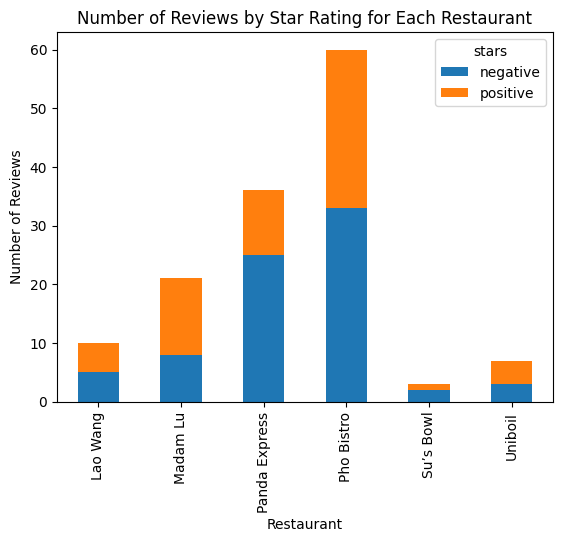

In [288]:
# Visualize the distribution of negative and positive reviews of each restaurant
import matplotlib.pyplot as plt

unique_stars_count = filtered_df.groupby('name')['stars'].value_counts().unstack()

unique_stars_count.plot(kind='bar', stacked=True)
plt.title('Number of Reviews by Star Rating for Each Restaurant')
plt.xlabel('Restaurant')
plt.ylabel('Number of Reviews')
plt.show()


In [289]:
# Distribution of the negative and positive review in each four topics

topic_counts = filtered_df.groupby('Name')['stars'].value_counts().unstack()
topic_counts

stars,negative,positive
Name,,
price,20,12
quality,4,9
service,39,36
wait,13,4


In [290]:
# Distribution in Percentage format

topic_percentages = (100 * topic_counts.div(topic_counts.sum(axis=1), axis=0)).round(1).astype(str) + '%'
topic_percentages


stars,negative,positive
Name,,
price,62.5%,37.5%
quality,30.8%,69.2%
service,52.0%,48.0%
wait,76.5%,23.5%


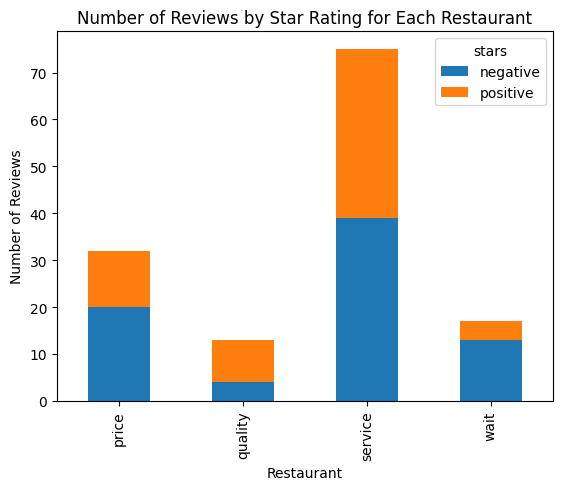

In [291]:
# Visualize the distribution
topic_stars_count = filtered_df.groupby('Name')['stars'].value_counts().unstack()

topic_stars_count.plot(kind='bar', stacked=True)
plt.title('Number of Reviews by Star Rating for Each Restaurant')
plt.xlabel('Restaurant')
plt.ylabel('Number of Reviews')
plt.show()

In [292]:
# Visualize the top 10 words in each four topics
topic_model.visualize_barchart(top_n_topics=4,n_words=10,height = 500)

In [ ]:
pip install wordcloud

In [272]:
from wordcloud import WordCloud, STOPWORDS

In [293]:
freq = topic_model.get_topic_info()
print("Number of topics: {}".format(len(freq)))
freq.head(4)

Number of topics: 20


,Topic,Count,Name,Representation,Representative_Docs
0,0,75,service,"[restaurant, service, food, customer, customer...","[As much as I love Panda, I'm very disappointe..."
1,1,32,price,"[restaurant, food, bistro, pho, pricey, expens...",[As a pho connoisseur of sorts (my parents are...
2,2,15,wait,"[restaurant, waiting, wait, food, waited, eat,...",[It's clean and well lighted. It has a menu f...
3,3,13,quality,"[food, tasted, eat, delicious, taste, pho, fre...",[I am speaking on behalf of a to-go chicken ph...


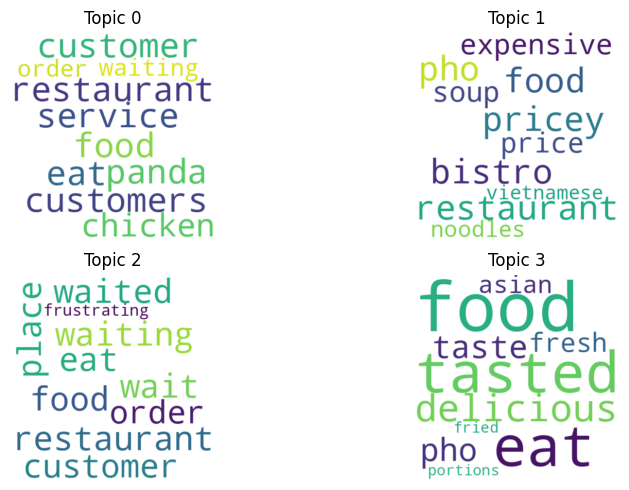

In [294]:
# Create word clouds for the first four topics
number_of_topics = 4
topics_to_visualize = freq.iloc[0:number_of_topics]["Topic"]

# Set up the figure size for four subplots
plt.figure(figsize=(10, 5))

# Loop through the topics and add a subplot for each word cloud
for i, topic_number in enumerate(topics_to_visualize, start=1):
    # Get the words and their frequencies for the current topic
    topic_words = dict(topic_model.get_topic(topic_number))

    # Generate the word cloud
    wordcloud = WordCloud(width=400, height=400, background_color='white', min_font_size=10).generate_from_frequencies(topic_words)

    # Add a new subplot in a 2x2 grid
    ax = plt.subplot(2, 2, i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_number}')
    plt.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
